In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Zomato data .csv')

In [4]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Conclusion: There is no null value in the dataframe

Text(0.5, 0, 'Type of restaurant')

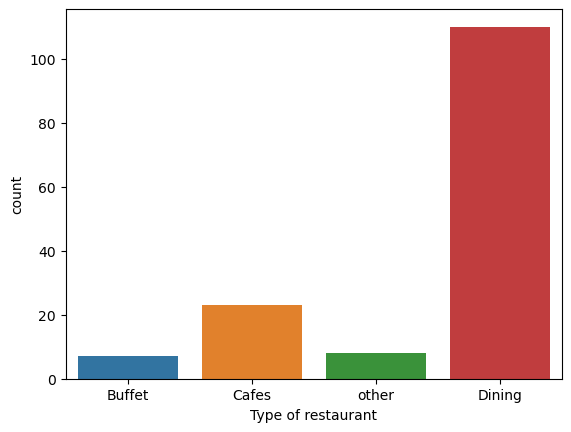

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion: Majority of restaurant falls into dining

In [20]:
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})

Text(0, 0.5, 'Votes')

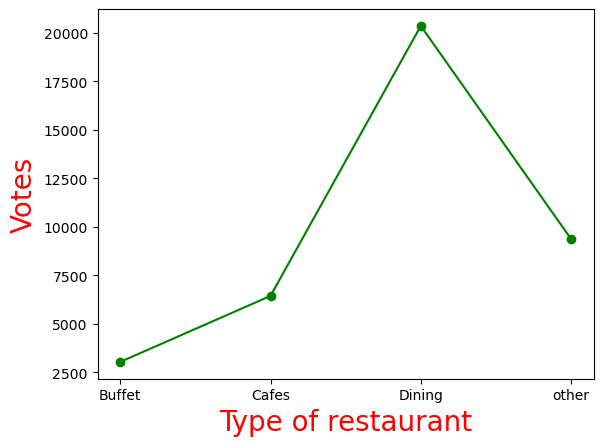

In [25]:
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [36]:
max=df['votes'].max()
restaurent_with_max_votes=df.loc[df['votes']==max,'name']

In [37]:
restaurent_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

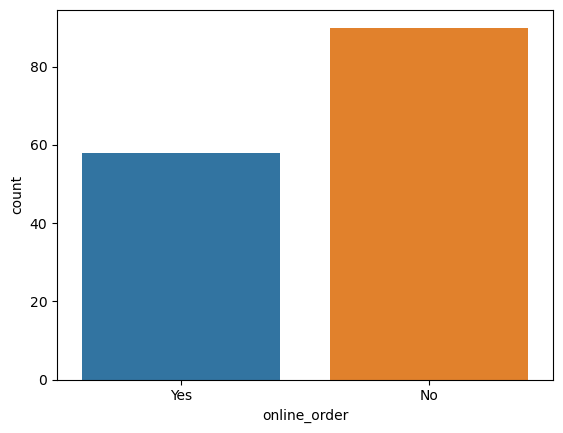

In [38]:
sns.countplot(x=df['online_order'])

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

Text(0.5, 1.0, 'Rating Distribution')

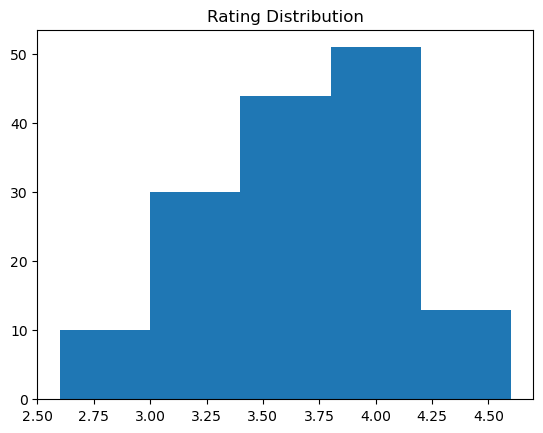

In [40]:
plt.hist(df['rate'],bins=5)
plt.title("Rating Distribution")

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

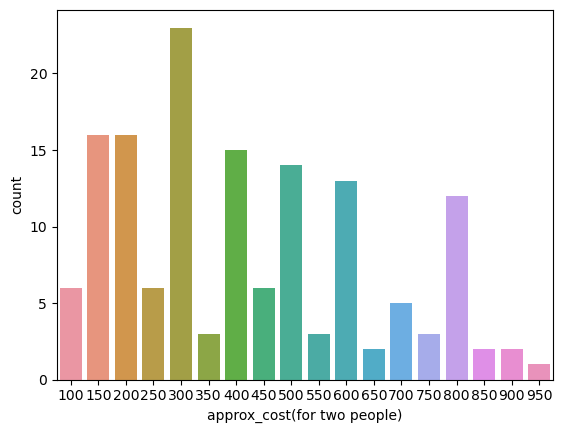

In [41]:
sns.countplot(x=df['approx_cost(for two people)'])

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

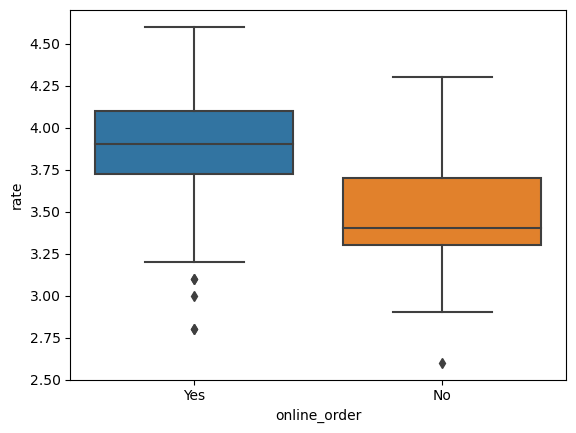

In [43]:
sns.boxplot(x='online_order',y='rate',data=df)

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

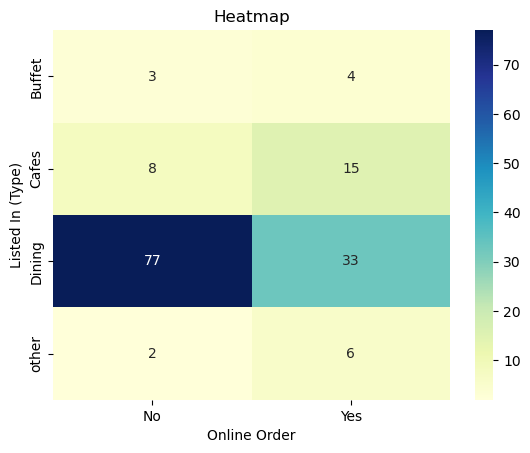

In [51]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [ ]:
CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
    This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.